# Part 1 – Present an Overview of Hyper-Parameter Optimization: A Review of Algorithms and Applications (from the attached paper)


1. HPO là gì?

Hyper-Parameter Optimization (HPO) là quá trình tự động tìm bộ siêu tham số (learning rate, batch size, số filters/units, dropout, optimizer, v.v.) để tối ưu metric (accuracy/F1/AUC hoặc giảm loss) trên tập validation.

Vai trò: giảm thử-sai thủ công, cải thiện hiệu suất mô hình, là “xương sống” của AutoML.

Hai trụ cột:

Search algorithm: cách lấy mẫu cấu hình siêu tham số.

Trial scheduler / Early-stopping: cách phân bổ ngân sách và dừng sớm những cấu hình kém.


2. Các siêu tham số “đáng tune”

Huấn luyện: learning rate (LR), batch size, optimizer (SGD/momentum, RMSprop, Adam), lịch LR (exponential, cosine, cyclical), số epoch, early-stopping patience.

Kiến trúc: số tầng/lớp (depth), số filters (Conv), số units (Dense), kernel size, dropout, regularization (L1/L2), activation (ReLU/LeakyReLU/ELU/Swish).

Tiền xử lý/augmentation (thị giác): xoay/cắt/phóng to, normalization, mixup/cutout (nếu áp dụng).

Gợi ý nhanh:

LR là nút vặn quan trọng nhất → dùng log-scale khi search (vd: 1e-4 → 1e-2).

Batch size {32, 64, 128}; dropout [0.2–0.5]; filters {32, 64, 128}; units {64, 128, 256}.

Ưu tiên Adam cho baseline; khi đã ổn có thể thử SGD+Momentum để tối ưu thêm.


3. Thuật toán tìm kiếm (Search Algorithms)
   3.1 Grid Search

Vét cạn trên lưới giá trị cố định; dễ hiểu, dễ song song.

Nhược: bùng nổ tổ hợp khi nhiều tham số (curse of dimensionality), tốn kém.

3.2 Random Search

Lấy mẫu ngẫu nhiên trong không gian liên tục/rời rạc; thường hiệu quả hơn grid khi không phải mọi tham số đều quan trọng như nhau.

Dùng tốt cho giai đoạn thăm dò (exploration) sớm.

3.3 Bayesian Optimization (BO)

Dùng mô hình thay thế (thường Gaussian Process/TPE/KDE) để dẫn hướng việc chọn cấu hình mới thông qua hàm lựa chọn (acquisition; ví dụ Expected Improvement, UCB).

Điểm mạnh: tiết kiệm số lần thử khi mỗi lần train rất tốn thời gian.

3.4 TPE (Tree-Parzen Estimators)

Dạng BO dựa trên ước lượng mật độ; xử lý tốt biến categorical & không gian có điều kiện (conditional search space).

Nổi tiếng qua HyperOpt; là một “xương sống” trong nhiều framework.


4. Cấp phát tài nguyên & dừng sớm (Schedulers)
   4.1 Median Stopping

Dừng một trial nếu nó tệ hơn median của các trial đã hoàn tất tại cùng mốc tiến trình.

Đơn giản, giảm lãng phí, có trong Vizier/Ray/NNI.

4.2 Learning-Curve Extrapolation

Dự đoán sớm kết quả cuối cùng từ đường cong học (loss/acc theo epoch) để quyết định dừng/tiếp tục.

4.3 Successive Halving (SHA)

Chia ngân sách; đánh giá ngắn nhiều cấu hình, loại dần phần kém nhất, dồn tài nguyên cho phần tốt.

4.4 HyperBand (HB)

Tổng quát hóa SHA: cân bằng giữa “số trial” và “ngân sách mỗi trial”.

Phù hợp khi cần song song mạnh và tối ưu thời gian tổng thể.

4.5 ASHA (Asynchronous SHA)

Biến thể bất đồng bộ của SHA/HB; tận dụng tài nguyên tốt hơn trong môi trường phân tán (không chờ trial chậm).

4.6 BOHB

Kết hợp BO (TPE/KDE) với HyperBand: vừa dẫn hướng (thông minh) vừa tiết kiệm (loại sớm).

Thường vượt HyperBand khi đủ ngân sách.


5. Công cụ tiêu biểu

Ray Tune: hỗ trợ Random/BO/TPE, SHA/ASHA/HyperBand, dễ phân tán.

Microsoft NNI: nhiều thuật toán HPO, UI quản lý thí nghiệm.

Google Vizier (hoặc dịch vụ tương tự): BO mạnh mẽ, có median/curve-fitting.

Keras Tuner: Hyperband, Bayesian, Random; dễ tích hợp Keras/TensorFlow.


6. Quy trình HPO đề nghị (áp dụng cho Fashion-MNIST)

Xác định metric & ràng buộc: ví dụ val_accuracy, ngân sách tối đa (số trials × epochs/trial).

Đặt search space (log-scale cho LR, rời rạc cho batch size/filters/units, [0–0.6] cho dropout…).

Chọn chiến lược:

Nhanh-gọn: Random + ASHA/HyperBand.

Thông minh: TPE/BO + HyperBand/ASHA (BOHB).

Thiết lập early-stopping (median/ASHA) và seed để tái lập.

Chạy song song nếu có GPU/CPU; log kết quả (tensorboard/csv).

Lấy best config → retrain full budget → đánh giá trên test.

Phân tích độ nhạy: vẽ Partial Dependence / importance theo LR, batch, dropout… để rút kinh nghiệm.


Kết luận ngắn: HPO = (Search) × (Scheduler). Bài thực hành nên bắt đầu bằng Random/Hyperband/ASHA để có baseline nhanh, rồi chuyển sang TPE/BO + HyperBand (BOHB) khi muốn hiệu quả tối đa trong cùng ngân sách.


# Part 2- Image Classification & Hyperparameter Turning on Fashion-MNIST.


The objective of this project is to predict fashion classes such as pants, shirts, and shoes from grayscale images. This guided project is practical and directly applicable to the fashion industry. You can add this project to your portfolio of projects which is essential for your next job interview.
Learning Objectives

---

• Perform data cleaning, feature engineering and visualization
• Understand the theory and intuition behind artificial neural networks
• Build, train and test an artificial neural network model in Keras and Tensorflow
Overview of Health Care Systems and


**Objective:** To classify images of different pieces of clothing.

**Client & Data-Set:** Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Data-set is publicly available on kaggle and **[Zalando Fashion MNIST repository](https://github.com/zalandoresearch/fashion-mnist)** on Github.

Fashion-MNIST is intended as direct drop-in replacement for the original MNIST dataset. It shares the same image size and structure of training and testing splits.

**Business Impact:** E-commerce companies have lots of items for sale online which requires lots of images to be displayed on their websites, applications and on social media. And it takes lot of human power and time to separate these images into respective groups. This classifier which we are going to build helps businesses to categorize images into respective groups.

**Labels:** Each training and test example is assigned to one of the following labels:

• 0 - T-shirt/top
• 1 - Trouser
• 2 - Pullover
• 3 - Dress
• 4 - Coat
• 5 - Sandal
• 6 - Shirt
• 7 - Sneaker
• 8 - Bag
• 9 - Ankle boot


# TASK #1: UNDERSTAND THE PROBLEM STATEMENT


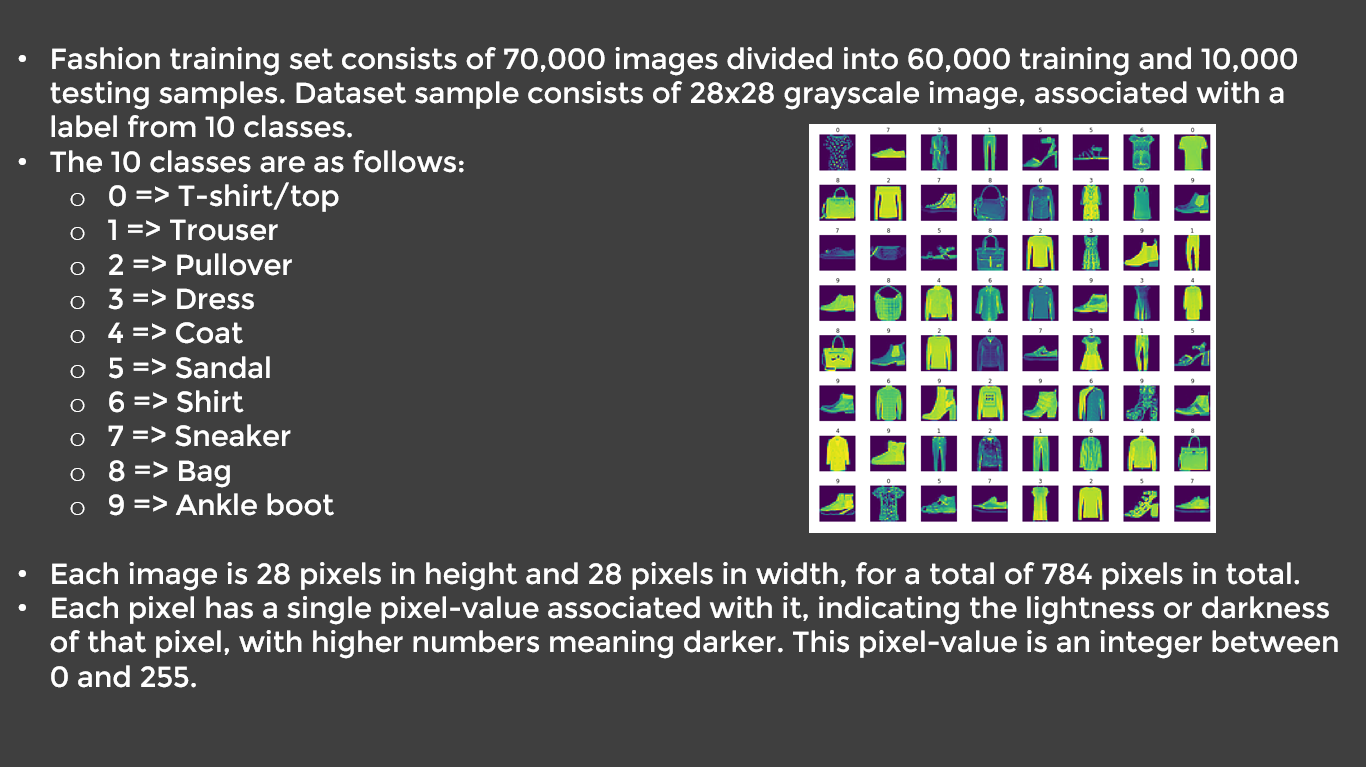


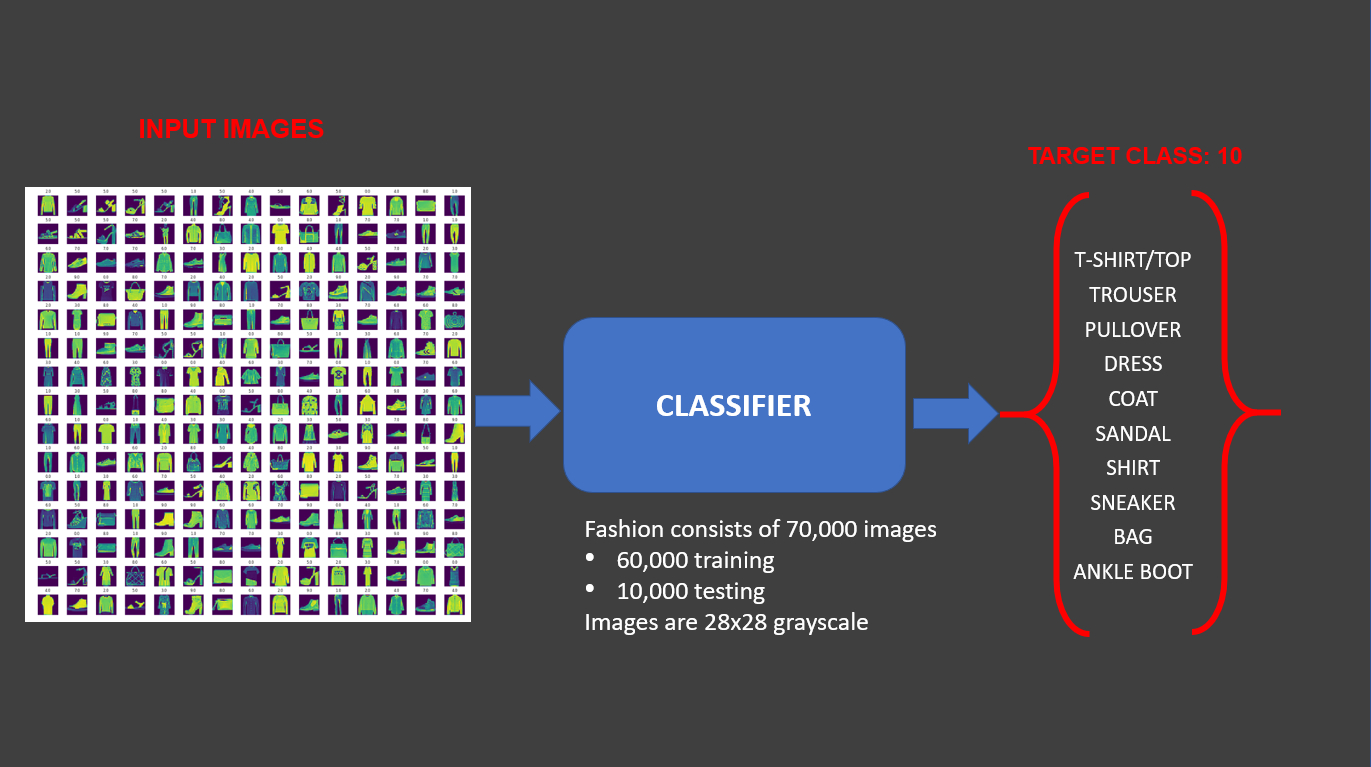


In [1]:
!python -m pip install numpy pandas matplotlib scikit-learn tensorflow keras pillow jupyterlab keras-tuner


DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\bs4-0.0.2-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\lxml-5.3.0-py3.13-win-amd64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\lib\site-packages\narwhals-1.19.0-py3.13.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\admin\miniconda3\envs\myenvironment\l


  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
  Using cached markdown-3.9-py3-none-any.whl.metad

In [ ]:
# ====== Cell: Fix imports + install pydot/graphviz (paste vào notebook) ======
from IPython.display import Image, display
import sys
import subprocess
import importlib
import shutil
import os

# 1) Install python packages needed for plot_model (pydot, graphviz)


def pip_install(pkgs):
    cmd = [sys.executable, "-m", "pip", "install", "--quiet"] + pkgs
    print("Running:", " ".join(cmd))
    try:
        subprocess.check_call(cmd)
    except subprocess.CalledProcessError as e:
        print("pip install failed:", e)
        print("You may need to run the command manually in terminal.")


pip_install(["pydot", "graphviz"])

# 2) Recommended imports using tensorflow.keras (avoid mixing with standalone 'keras')
try:
    import numpy as np
    import pandas as pd
    import itertools
    import matplotlib.pyplot as plt

    from sklearn.model_selection import train_test_split
    from sklearn.utils import shuffle
    from sklearn.metrics import confusion_matrix, classification_report

    import tensorflow as tf
    print("Imported TensorFlow, version:",
          getattr(tf, "__version__", "unknown"))

    # Use tf.keras everywhere
    from tensorflow.keras import layers, models, callbacks, utils, optimizers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.utils import to_categorical, plot_model
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.layers import (
        Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,
        BatchNormalization, ZeroPadding2D
    )
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    from tensorflow.keras.callbacks import EarlyStopping

    print("Imported tensorflow.keras modules successfully.")
except Exception as e:
    print("Import error:", type(e).__name__, e)
    raise

# 3) Check whether system Graphviz binary 'dot' exists
dot_path = shutil.which("dot")
if dot_path:
    print("Graphviz 'dot' binary found at:", dot_path)
else:
    print("\nWARNING: Graphviz system binary 'dot' NOT found.")
    print("plot_model requires Graphviz system program to produce images.")
    print("Install Graphviz system package for your OS:\n")
    if sys.platform.startswith("linux"):
        print("  Ubuntu/Debian: sudo apt-get update && sudo apt-get install -y graphviz")
    elif sys.platform == "darwin":
        print("  macOS (Homebrew): brew install graphviz")
    elif sys.platform.startswith("win"):
        print("  Windows: install from https://graphviz.org/download/ or use choco: choco install graphviz")
    else:
        print("  See https://graphviz.org/download/ for your platform.")
    print("\nAfter installing system Graphviz, restart the notebook kernel and re-run this cell.")

# 4) Quick test: build tiny model and try to export model.png (only if pydot + system dot present)
print("\nAttempting quick plot_model test...")

test_model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

out_file = "model_test.png"
try:
    plot_model(test_model, show_shapes=True, to_file=out_file)
    if os.path.exists(out_file):
        display(Image(out_file))
        print("plot_model succeeded — wrote", out_file)
    else:
        print("plot_model called but output file not created. Check pydot + Graphviz installation.")
except Exception as e:
    print("plot_model failed:", type(e).__name__, e)
    print("Common fixes:")
    print(" - Ensure Python package 'pydot' is installed (we attempted pip install).")
    print(" - Ensure Graphviz system binary 'dot' is installed and on PATH (see instructions above).")


Running: c:\Users\Admin\miniconda3\envs\myenvironment\python.exe -m pip install --quiet pydot graphviz
Imported TensorFlow, version: 2.20.0
Imported tensorflow.keras modules successfully.

plot_model requires Graphviz system program to produce images.
Install Graphviz system package for your OS:

  Windows: install from https://graphviz.org/download/ or use choco: choco install graphviz

After installing system Graphviz, restart the notebook kernel and re-run this cell.

Attempting quick plot_model test...
You must install pydot (`pip install pydot`) for `plot_model` to work.
plot_model called but output file not created. Check pydot + Graphviz installation.


c:\Users\Admin\miniconda3\envs\myenvironment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# TASK #2: IMPORT LIBRARIES AND DATASETS


In [ ]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist


In [ ]:
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:


import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.


ModuleNotFoundError: No module named 'jupyterthemes'

In [ ]:
# Use the same dataset made readily available by keras Using the following lines of code:


Python: 3.13.1  |  TensorFlow: 2.20.0
jupyterthemes not available or failed to apply theme — continuing without it

Dataset loaded.
 - train_images shape: (60000, 28, 28)
 - train_labels shape: (60000,)
 - test_images shape: (10000, 28, 28)
 - test_labels shape: (10000,)

Class distribution (train):


,class_id,class_name,train_count,test_count
0,0,T-shirt/top,6000,1000
1,1,Trouser,6000,1000
2,2,Pullover,6000,1000
3,3,Dress,6000,1000
4,4,Coat,6000,1000
5,5,Sandal,6000,1000
6,6,Shirt,6000,1000
7,7,Sneaker,6000,1000
8,8,Bag,6000,1000
9,9,Ankle boot,6000,1000


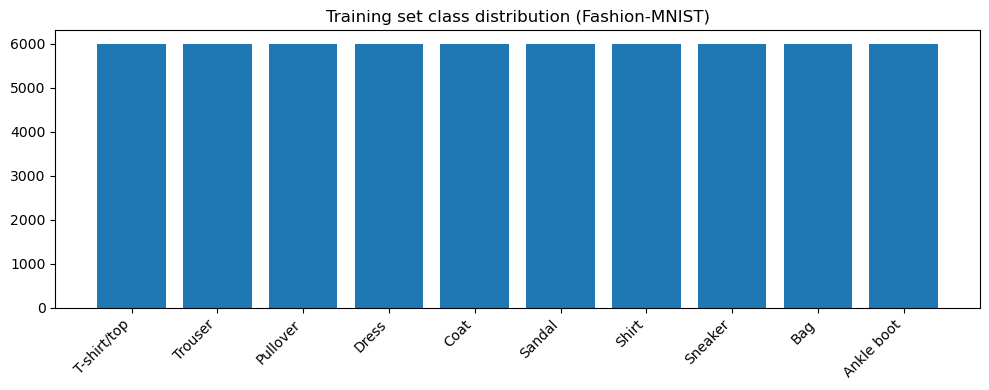

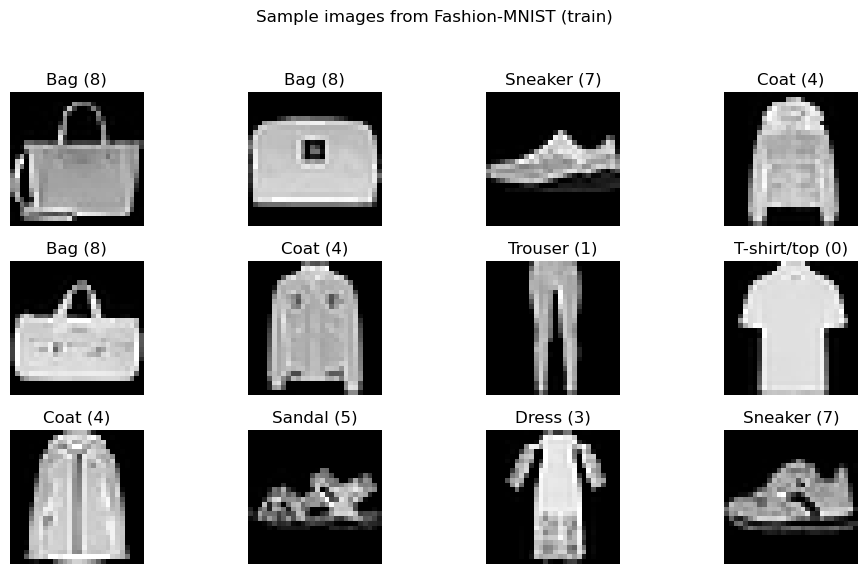


After preprocessing:
 - x_train shape: (60000, 28, 28, 1)
 - x_test shape:  (10000, 28, 28, 1)
 - y_train shape: (60000,)
 - y_test shape:  (10000,)

Task 2 finished: dataset loaded, preprocessed and ready for modeling.


In [ ]:
# ===== Task 2: Import libraries and load Fashion-MNIST (paste entire cell into notebook) =====
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import numpy as np
import sys
import platform
import warnings
warnings.filterwarnings("ignore")

# Basic imports

# sklearn utilities

# TensorFlow / Keras (use tf.keras to avoid mixing 'keras' standalone)

print(f"Python: {platform.python_version()}  |  TensorFlow: {tf.__version__}")

# Try importing jupyterthemes (optional). If missing, skip.
try:
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    print("jupyterthemes: applied 'monokai' theme")
except Exception:
    print("jupyterthemes not available or failed to apply theme — continuing without it")

# -------------------------
# Load Fashion-MNIST
# -------------------------
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

# quick info
print("\nDataset loaded.")
print(" - train_images shape:", train_images.shape)   # expect (60000,28,28)
print(" - train_labels shape:", train_labels.shape)
print(" - test_images shape:", test_images.shape)
print(" - test_labels shape:", test_labels.shape)

# Class names mapping
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Count per class (train)
train_counts = pd.Series(train_labels).value_counts().sort_index()
test_counts = pd.Series(test_labels).value_counts().sort_index()
df_counts = pd.DataFrame({
    "class_id": train_counts.index,
    "train_count": train_counts.values,
    "test_count": test_counts.values
})
df_counts["class_name"] = df_counts["class_id"].map(lambda i: class_names[i])

print("\nClass distribution (train):")
display(df_counts[["class_id", "class_name", "train_count", "test_count"]])

# Plot distribution
plt.figure(figsize=(10, 4))
plt.bar(df_counts["class_name"], df_counts["train_count"])
plt.xticks(rotation=45, ha='right')
plt.title("Training set class distribution (Fashion-MNIST)")
plt.tight_layout()
plt.show()

# Show sample images (first 12 random)
np.random.seed(42)
sel = np.random.choice(len(train_images), size=12, replace=False)
plt.figure(figsize=(10, 6))
for i, idx in enumerate(sel):
    ax = plt.subplot(3, 4, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f"{class_names[train_labels[idx]]} ({train_labels[idx]})")
    plt.axis('off')
plt.suptitle("Sample images from Fashion-MNIST (train)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Preprocess for model usage (normalize and add channel)
x_train = train_images.astype('float32') / 255.0
x_test = test_images.astype('float32') / 255.0

# expand dims to (N,28,28,1) for Conv2D input
if x_train.ndim == 3:
    x_train = np.expand_dims(x_train, -1)
    x_test = np.expand_dims(x_test, -1)

y_train = train_labels.copy()
y_test = test_labels.copy()

print("\nAfter preprocessing:")
print(" - x_train shape:", x_train.shape)
print(" - x_test shape: ", x_test.shape)
print(" - y_train shape:", y_train.shape)
print(" - y_test shape: ", y_test.shape)

# Save common objects into globals for downstream cells
globals().update({
    "x_train": x_train, "x_test": x_test,
    "y_train": y_train, "y_test": y_test,
    "class_names": class_names,
    "train_images_raw": train_images, "train_labels_raw": train_labels
})

print("\nTask 2 finished: dataset loaded, preprocessed and ready for modeling.")


**PRACTICE OPPORTUNITY #1:**

- **Check out the sizes of both training and testing datasets**


In [ ]:
# PRACTICE OPPORTUNITY #1
# Check sizes of training and testing datasets, number of classes, and per-class counts

import numpy as np
import pandas as pd

# Nếu bạn đã chạy Task 2 thì x_train/x_test/y_train/y_test đã có sẵn.
# Nếu chưa, uncomment 2 dòng dưới để load nhanh:
# import tensorflow as tf
# (x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.fashion_mnist.load_data()

# Try to find variables from globals
try:
    x_train  # exists?
    x_test
    y_train
    y_test
    used_from_task2 = True
except NameError:
    # fallback: load directly
    import tensorflow as tf
    (train_images, train_labels), (test_images,
                                   test_labels) = tf.keras.datasets.fashion_mnist.load_data()
    x_train = train_images.astype('float32')/255.0
    x_test = test_images.astype('float32')/255.0
    # expand dims if needed
    if x_train.ndim == 3:
        x_train = np.expand_dims(x_train, -1)
        x_test = np.expand_dims(x_test, -1)
    y_train = train_labels
    y_test = test_labels
    used_from_task2 = False

# Basic sizes
n_train = x_train.shape[0]
n_test = x_test.shape[0]
input_shape = x_train.shape[1:]  # e.g., (28,28,1)
num_classes = len(np.unique(np.concatenate([y_train, y_test])))

print("=== Dataset sizes ===")
print(f"Train samples : {n_train}")
print(f"Test samples  : {n_test}")
print(f"Input shape   : {input_shape}")
print(f"Number classes: {num_classes}")

# Per-class counts (train & test)
train_counts = pd.Series(y_train).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()
df = pd.DataFrame({
    "class_id": train_counts.index,
    "train_count": train_counts.values,
    "test_count": test_counts.values
})
# optional: map names if available
try:
    class_names
    df["class_name"] = df["class_id"].map(lambda i: class_names[i])
except NameError:
    df["class_name"] = df["class_id"].astype(str)

print("\n=== Per-class sample counts ===")
display(df[["class_id", "class_name", "train_count", "test_count"]])

# Quick sanity checks
print("\nSanity checks:")
print(" Sum train_count == n_train ?", df["train_count"].sum() == n_train)
print(" Sum test_count  == n_test  ?", df["test_count"].sum() == n_test)

# Show a tiny sample for manual check
print("\nExample train indices and labels (first 10):")
print(list(enumerate(y_train[:10])))


=== Dataset sizes ===
Train samples : 60000
Test samples  : 10000
Input shape   : (28, 28, 1)
Number classes: 10

=== Per-class sample counts ===


,class_id,class_name,train_count,test_count
0,0,T-shirt/top,6000,1000
1,1,Trouser,6000,1000
2,2,Pullover,6000,1000
3,3,Dress,6000,1000
4,4,Coat,6000,1000
5,5,Sandal,6000,1000
6,6,Shirt,6000,1000
7,7,Sneaker,6000,1000
8,8,Bag,6000,1000
9,9,Ankle boot,6000,1000



Sanity checks:
 Sum train_count == n_train ? True
 Sum test_count  == n_test  ? True

Example train indices and labels (first 10):
[(0, np.uint8(9)), (1, np.uint8(0)), (2, np.uint8(0)), (3, np.uint8(3)), (4, np.uint8(0)), (5, np.uint8(2)), (6, np.uint8(7)), (7, np.uint8(2)), (8, np.uint8(5)), (9, np.uint8(5))]


# TASK #3: PERFORM DATA VISUALIZATION


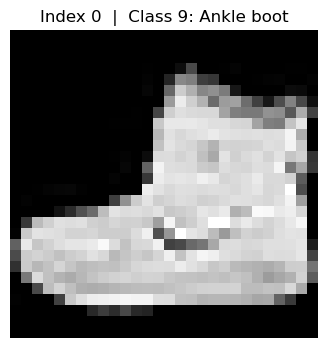

In [ ]:
# Select a sample image and visualize it
# ===== Task 3 - Part A: Show one sample image =====
import numpy as np
import matplotlib.pyplot as plt

# Try to reuse variables from Task 2, otherwise load dataset
try:
    train_images_raw  # if exists
    train_labels_raw
except NameError:
    import tensorflow as tf
    (train_images_raw, train_labels_raw), _ = tf.keras.datasets.fashion_mnist.load_data()

# Class names mapping (fallback if not present)
try:
    class_names
except NameError:
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]

# Choose index to display (change nếu muốn)
sample_idx = 0  # <-- đổi số này để xem ảnh khác
if sample_idx < 0 or sample_idx >= len(train_images_raw):
    raise ValueError(
        f"sample_idx {sample_idx} out of range (0..{len(train_images_raw)-1})")

img = train_images_raw[sample_idx]
label = int(train_labels_raw[sample_idx])
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap='gray')
plt.title(f"Index {sample_idx}  |  Class {label}: {class_names[label]}")
plt.axis('off')
plt.show()


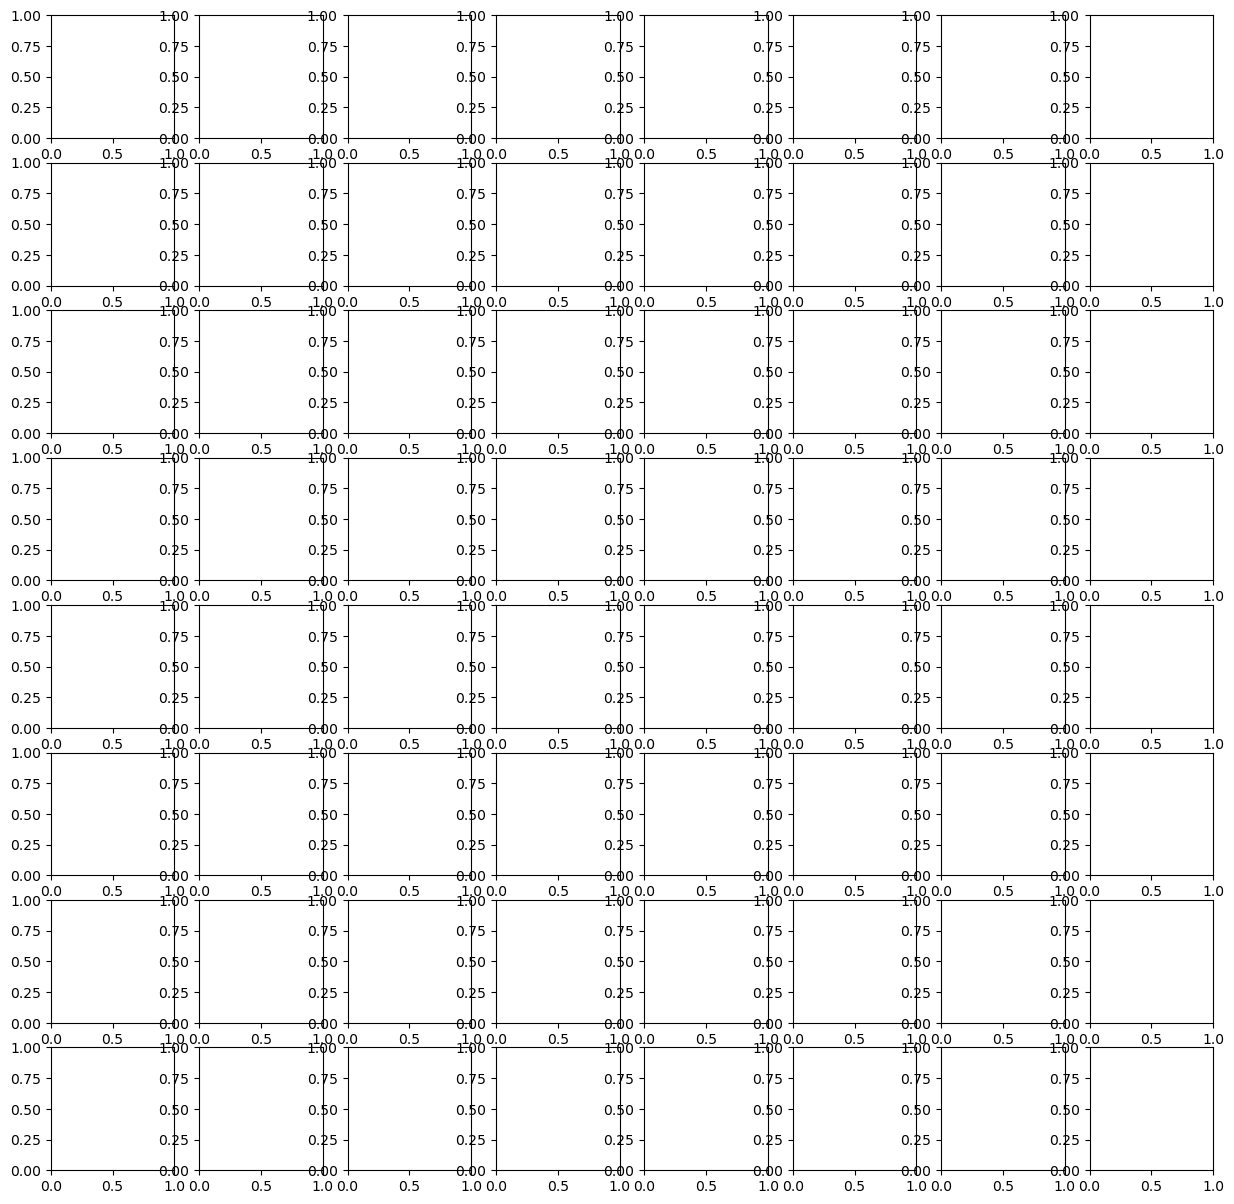

In [ ]:
# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot


W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize=(15, 15))
axes = axes.ravel()


**PRACTICE OPPORTUNITY #2:**

- **Plot a grid containing 144 images and perform a sanity check on the data**


Total train samples: 60000
train_images_raw.shape: (60000, 28, 28)
train_images_raw.dtype: uint8
Pixel range:  0 to 255


,class_id,train_count,class_name
0,0,6000,T-shirt/top
1,1,6000,Trouser
2,2,6000,Pullover
3,3,6000,Dress
4,4,6000,Coat
5,5,6000,Sandal
6,6,6000,Shirt
7,7,6000,Sneaker
8,8,6000,Bag
9,9,6000,Ankle boot


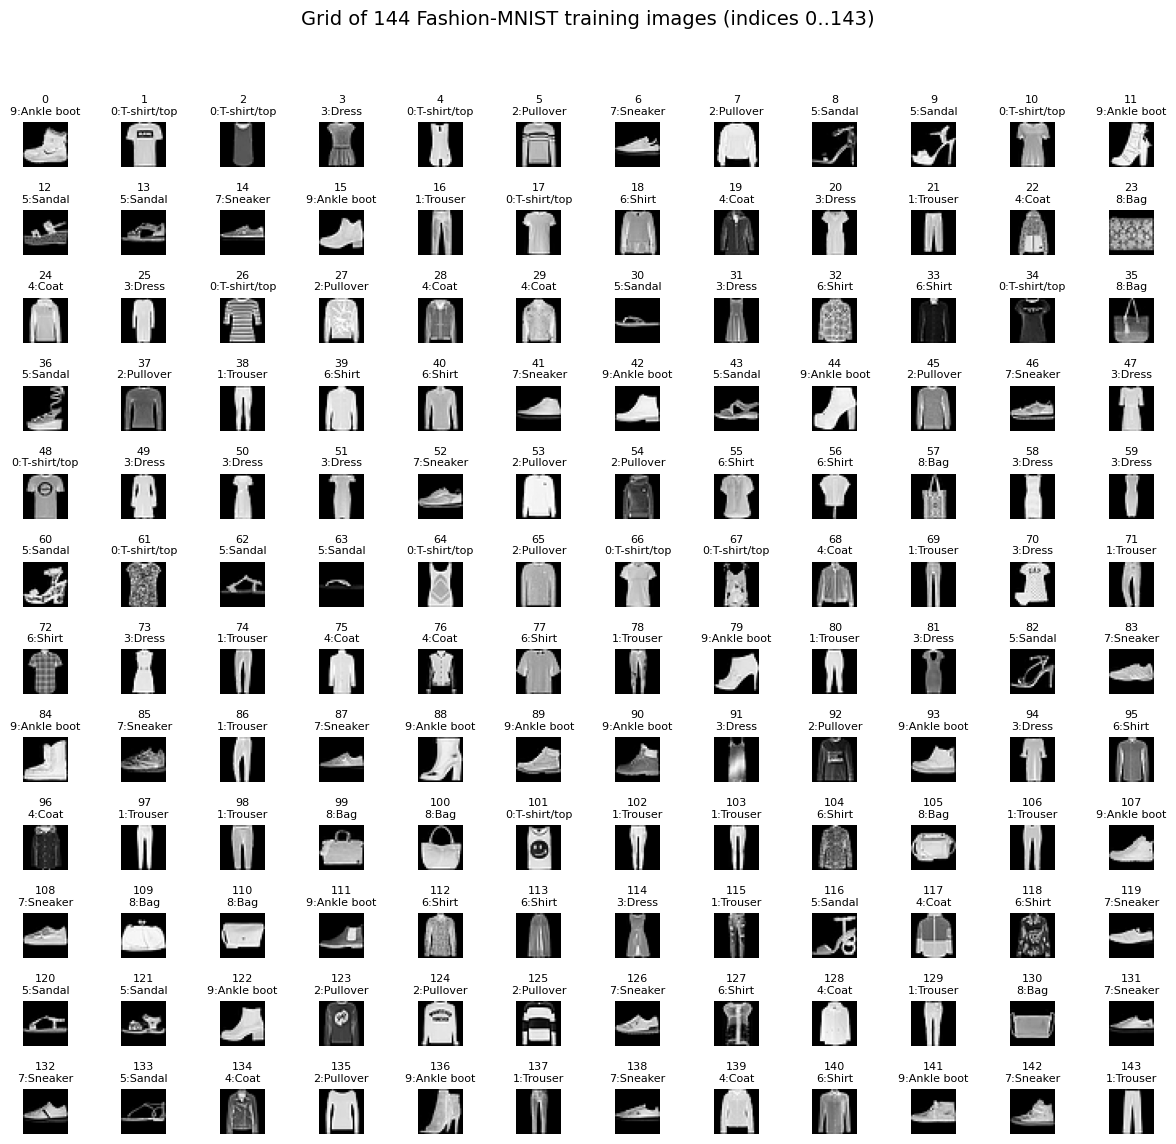


Quick stats on the shown indices:
0    13
1    18
2    13
3    16
4    13
5    15
6    16
7    15
8     9
9    16
Name: count, dtype: int64

If class distribution looks heavily unbalanced in the small sample, try random sampling or inspect specific classes.


In [ ]:
# ===== Task 3 - Part B: Plot a grid of 144 images and basic sanity checks =====
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load or reuse variables
try:
    train_images_raw, train_labels_raw
except NameError:
    import tensorflow as tf
    (train_images_raw, train_labels_raw), (test_images_raw,
                                           test_labels_raw) = tf.keras.datasets.fashion_mnist.load_data()

# class_names fallback
try:
    class_names
except NameError:
    class_names = [
        "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
    ]

n_total = len(train_images_raw)
print(f"Total train samples: {n_total}")

# Sanity checks: shapes, dtype, min/max
print("train_images_raw.shape:", train_images_raw.shape)
print("train_images_raw.dtype:", train_images_raw.dtype)
print("Pixel range: ", train_images_raw.min(), "to", train_images_raw.max())

# Per-class counts (quick)
counts = pd.Series(train_labels_raw).value_counts().sort_index()
df_counts = pd.DataFrame(
    {'class_id': counts.index, 'train_count': counts.values})
df_counts['class_name'] = df_counts['class_id'].map(lambda i: class_names[i])
display(df_counts)

# Choose indices to display (first 144 or random sample)
num = 144
if n_total < num:
    raise ValueError("Không đủ ảnh để vẽ grid (cần >=144).")
# you can switch to random sample by uncommenting next line:
# idxs = np.random.choice(n_total, size=num, replace=False)
idxs = np.arange(num)  # first 144 images (0..143)

W = 12
H = 12
fig, axes = plt.subplots(H, W, figsize=(12, 12))
axes = axes.ravel()

for ax, i, idx in zip(axes, range(num), idxs):
    img = train_images_raw[idx]
    ax.imshow(img, cmap='gray')
    lbl = int(train_labels_raw[idx])
    # small title with id and short label
    ax.set_title(f"{idx}\n{lbl}:{class_names[lbl]}", fontsize=8)
    ax.axis('off')

plt.suptitle(
    "Grid of 144 Fashion-MNIST training images (indices 0..143)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional quick stats for sanity
print("\nQuick stats on the shown indices:")
shown_counts = pd.Series(train_labels_raw[idxs]).value_counts().sort_index()
print(shown_counts)

print("\nIf class distribution looks heavily unbalanced in the small sample, try random sampling or inspect specific classes.")


# TASK #4: PREPARE THE DATA FOR TRAINING


In [ ]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)


In [ ]:
# ===== Task 4: Prepare the data for training (paste entire cell) =====
import numpy as np
import tensorflow as tf

# 1) Try to locate training/test arrays under common names used in notebook
# We'll prefer already-preprocessed names if they exist, otherwise fall back to raw loads.
found = {}

candidates = {
    "X_train": ["X_train", "x_train", "train_images", "train_images_raw"],
    "X_test":  ["X_test",  "x_test",  "test_images",  "test_images_raw"],
    "y_train_raw": ["y_train_raw", "train_labels", "train_labels_raw", "y_train"],
    "y_test_raw":  ["y_test_raw",  "test_labels",  "test_labels_raw",  "y_test"]
}

# helper to fetch variable from globals if exists
g = globals()
for key, names in candidates.items():
    for n in names:
        if n in g:
            found[key] = g[n]
            break

# If not found, load dataset fresh
if "X_train" not in found or "X_test" not in found or "y_train_raw" not in found or "y_test_raw" not in found:
    print("Some variables not found in workspace — loading Fashion-MNIST fresh via tf.keras.datasets...")
    (trX, trY), (teX, teY) = tf.keras.datasets.fashion_mnist.load_data()
    found.setdefault("X_train", trX)
    found.setdefault("X_test", teX)
    found.setdefault("y_train_raw", trY)
    found.setdefault("y_test_raw", teY)

# 2) Normalize pixel values to [0,1] (float32)
X_train = found["X_train"].astype("float32") / 255.0
X_test = found["X_test"].astype("float32") / 255.0
y_train_raw = np.array(found["y_train_raw"])  # integer labels
y_test_raw = np.array(found["y_test_raw"])

# 3) Ensure channel dimension exists: (N, 28, 28, 1)
if X_train.ndim == 3:
    X_train = np.expand_dims(X_train, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

# 4) One-hot encode labels to y_train / y_test (as in your screenshot)
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train_raw, number_cat)
y_test = tf.keras.utils.to_categorical(y_test_raw, number_cat)

# 5) Put variables into globals so downstream cells find them with expected names (X_train, y_train, etc.)
globals().update({
    "X_train": X_train, "X_test": X_test,
    "y_train": y_train, "y_test": y_test,
    "y_train_raw": y_train_raw, "y_test_raw": y_test_raw
})

# 6) Print shapes and quick previews (matching your screenshots)
print("After prepare:")
print(" X_train.shape:", X_train.shape)
print(" X_test.shape :", X_test.shape)
print(" y_train.shape:", y_train.shape)
print(" y_test.shape :", y_test.shape)
print("\nSample y_train (first 6 rows):")
print(y_train[:6])
print("\nSample X_train dtype/min/max:",
      X_train.dtype, X_train.min(), X_train.max())

# 7) Quick sanity: ensure sums match
print("\nSanity checks:")
print(" - #train images == y_train_raw length:",
      X_train.shape[0], "==", y_train_raw.shape[0])
print(" - #test  images == y_test_raw length: ",
      X_test.shape[0],  "==", y_test_raw.shape[0])


After prepare:
 X_train.shape: (60000, 28, 28, 1)
 X_test.shape : (10000, 28, 28, 1)
 y_train.shape: (60000, 10)
 y_test.shape : (10000, 10)

Sample y_train (first 6 rows):
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]

Sample X_train dtype/min/max: float32 0.0 0.003921569

Sanity checks:
 - #train images == y_train_raw length: 60000 == 60000
 - #test  images == y_test_raw length:  10000 == 10000


In [ ]:
X_train.shape


(60000, 28, 28, 1)

In [ ]:
y_train.shape


(60000, 10)

In [ ]:
y_train


array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_test = tf.keras.utils.to_categorical(y_test, number_cat)


In [ ]:
X_train.shape


(60000, 28, 28, 1)

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)


In [ ]:
X_train.shape


(60000, 28, 28, 1, 1, 1)

In [ ]:
y_train.shape


(60000, 10)

# TASK #5: BUILD A DEEP LEARNING MODEL


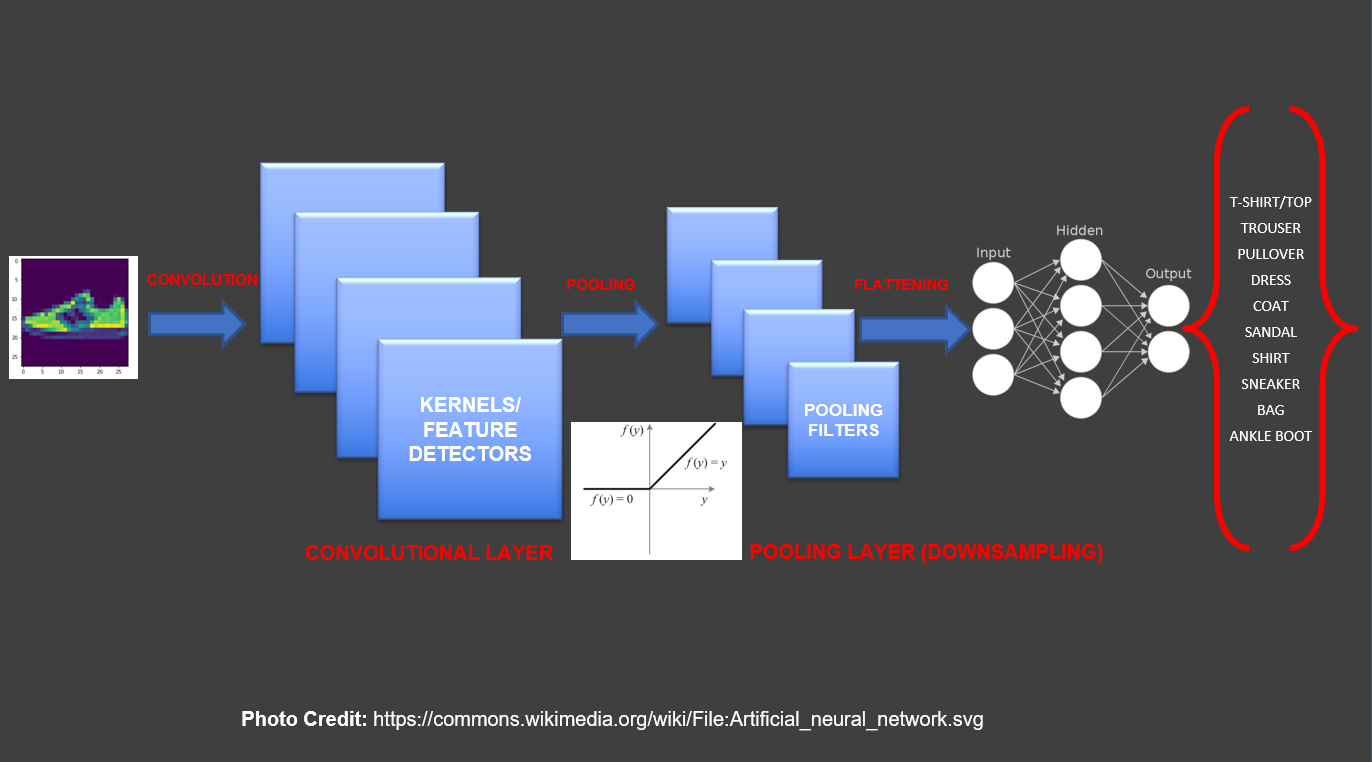


In [ ]:
from tensorflow.keras import datasets, layers, models
# ===== Task 5: Build a deep learning model (paste whole cell) =====
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# Reproducible seed (optional)
tf.random.set_seed(42)

# Input shape: adjust if your X_train has shape (N,28,28,1)
input_shape = (28, 28, 1)

model = models.Sequential(name="fashion_cnn")
# Conv block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=input_shape, name='conv2d'))
model.add(layers.MaxPooling2D((2, 2), name='max_pool_1'))

# Conv block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_1'))
model.add(layers.MaxPooling2D((2, 2), name='max_pool_2'))

# Conv block 3
model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))

# Flatten + Dense
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(64, activation='relu', name='dense'))
# final output: 10 classes, softmax
model.add(layers.Dense(10, activation='softmax', name='dense_1'))

# Compile the model (use categorical_crossentropy if y_train is one-hot encoded)
model.compile(
    optimizer=optimizers.Adam(),
    # if y are one-hot; use 'sparse_categorical_crossentropy' if not one-hot
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# ===== Optional: quick training snippet (uncomment to run) =====
# Note: ensure X_train, y_train exist and y_train is one-hot encoded (shape (N,10))
# from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
# history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, batch_size=64, callbacks=[es])


Model: "fashion_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# TASK #6: COMPILE AND TRAIN A DEEP LEARNING MODEL


In [ ]:
# Fix shapes, diagnose and retry training (paste whole cell)
import numpy as np
import tensorflow as tf
import traceback

print(">>> Diagnosing shapes before fix\n")

# show what we currently have (safe checks)
g = globals()
for name in ("X_train", "X_test", "y_train", "y_test", "cnn", "model"):
    if name in g:
        try:
            print(f"{name:8} shape/type:",
                  getattr(g[name], "shape", type(g[name])))
        except Exception as e:
            print(f"{name:8} info: {e}")

# 1) Fix X_train / X_test shape: remove extra singleton dims


def fix_image_array(arr, expected_spatial=(28, 28), keep_channel=True):
    """Squeeze singleton dims, then ensure shape (N, H, W, C) where C=1 if keep_channel."""
    a = np.array(arr)
    orig_shape = a.shape
    # remove all singleton dims except the batch dim if accidentally added
    a = np.squeeze(a)
    # If after squeeze we have (H,W) or (N,H,W) or (N,H,W,C)
    if a.ndim == 2:
        # single image -> expand to (1,H,W,1)
        a = np.expand_dims(a, 0)
    if a.ndim == 3:
        # likely (N,H,W) -> add channel
        a = np.expand_dims(a, -1)
    if a.ndim == 4:
        # ok
        pass
    # final check: ensure spatial dims match expected; if swapped channel-first, try to transpose
    if a.shape[1:3] != expected_spatial:
        # try common swaps: if shape is (N,1,H,W) or (N,C,H,W)
        if a.shape[2:4] == expected_spatial:
            # transpose from (N,C,H,W) -> (N,H,W,C)
            a = np.transpose(a, (0, 2, 3, 1))
        else:
            # give warning but do not break
            print("WARNING: unexpected spatial dims after fix:", a.shape)
    # ensure channel dim exists
    if a.ndim == 3:
        a = np.expand_dims(a, -1)
    # ensure channel is last
    if a.ndim == 4:
        pass
    return a, orig_shape, a.shape


# Apply to X_train/X_test if present
if "X_train" in g:
    X_train_fixed, orig, new = fix_image_array(g["X_train"])
    if orig != new:
        print(f"Fixed X_train: {orig} -> {new}")
        X_train = X_train_fixed.astype("float32")  # keep local name
        globals()["X_train"] = X_train
    else:
        X_train = X_train_fixed.astype("float32")
        globals()["X_train"] = X_train
        print(f"X_train shape OK: {new}")
else:
    raise RuntimeError(
        "X_train not found in workspace. Run data preparation (Task 4) first.")

if "X_test" in g:
    X_test_fixed, orig_t, new_t = fix_image_array(g["X_test"])
    if orig_t != new_t:
        print(f"Fixed X_test: {orig_t} -> {new_t}")
        X_test = X_test_fixed.astype("float32")
        globals()["X_test"] = X_test
    else:
        X_test = X_test_fixed.astype("float32")
        globals()["X_test"] = X_test
        print(f"X_test shape OK: {new_t}")
else:
    print("X_test not present — continuing with training only (no evaluation later).")

# 2) Normalize to [0,1] if dtype not float32
if X_train.dtype != np.float32:
    X_train = X_train.astype("float32") / 255.0
    globals()["X_train"] = X_train
if "X_test" in globals() and globals()["X_test"].dtype != np.float32:
    globals()["X_test"] = globals()["X_test"].astype("float32") / 255.0

# 3) Fix y_train if shape is (N, ) or (N,1), convert to one-hot if model expects categorical
if "y_train" in g:
    y_train = np.array(g["y_train"])
    if y_train.ndim == 1:
        # integer labels -> convert to categorical
        n_classes = int(np.max(y_train) + 1)
        y_train = tf.keras.utils.to_categorical(y_train, n_classes)
        globals()["y_train"] = y_train
        print(
            f"Converted y_train from 1D integers -> one-hot shape {y_train.shape}")
    elif y_train.ndim == 2 and (y_train.shape[1] == 1):
        y_train = tf.keras.utils.to_categorical(
            y_train.ravel(), int(np.max(y_train) + 1))
        globals()["y_train"] = y_train
        print(f"Converted y_train shape (N,1) -> one-hot {y_train.shape}")
    else:
        print(f"y_train shape OK: {y_train.shape}")
else:
    raise RuntimeError(
        "y_train not found in workspace. Run data preparation (Task 4) first.")

# 4) Check model input shape & adapt if necessary
cnn_obj = None
if "cnn" in g:
    cnn_obj = g["cnn"]
elif "model" in g:
    cnn_obj = g["model"]
elif "fashion_cnn" in g:
    cnn_obj = g["fashion_cnn"]

if cnn_obj is None:
    raise RuntimeError(
        "No model object (cnn/model) found. Build the model (Task 5) before training.")

print("\nModel input spec:", getattr(cnn_obj, "input_shape", "unknown"))
print("After fix X_train.shape:", X_train.shape)
print("y_train.shape:", globals()["y_train"].shape)

# If model expects different channels (e.g., 3) give warning
model_input = getattr(cnn_obj, "input_shape", None)
if model_input is not None:
    # model_input is like (None, H, W, C)
    try:
        expected_C = model_input[-1]
        if expected_C is not None and expected_C != X_train.shape[-1]:
            print(
                f"WARNING: Model expects channel={expected_C} but X_train channel={X_train.shape[-1]}")
            # Optionally adapt model or data: here we prefer to adapt data if possible (e.g., replicate channel or convert)
            if X_train.shape[-1] == 1 and expected_C == 3:
                print("Adapting X_train by repeating channels to 3 (grayscale->RGB)")
                X_train = np.repeat(X_train, 3, axis=-1)
                globals()["X_train"] = X_train
                if "X_test" in globals():
                    globals()["X_test"] = np.repeat(
                        globals()["X_test"], 3, axis=-1)
            else:
                print(
                    "If channel mismatch persists, rebuild model to match data shape or preprocess data accordingly.")
    except Exception:
        pass

# 5) Retry training with try/except to show clear error if still fails
print("\n>>> Attempting to fit model (1 epoch test) ...")
try:
    # small test run 1 epoch to validate shapes quickly
    hist = cnn_obj.fit(X_train, globals()[
                       "y_train"], epochs=1, batch_size=64, verbose=1)
    print("Fit succeeded for 1 epoch. You can continue training with more epochs now.")
except Exception as e:
    print("Training failed again. Traceback:")
    traceback.print_exc()
    raise


>>> Diagnosing shapes before fix

X_train  shape/type: (60000, 28, 28, 1, 1, 1)
X_test   shape/type: (10000, 28, 28, 1)
y_train  shape/type: (60000, 10)
y_test   shape/type: (10000, 10, 10)
cnn      shape/type: <class 'keras.src.models.sequential.Sequential'>
model    shape/type: <class 'keras.src.models.sequential.Sequential'>
Fixed X_train: (60000, 28, 28, 1, 1, 1) -> (60000, 28, 28, 1)
X_test shape OK: (10000, 28, 28, 1)
y_train shape OK: (60000, 10)

Model input spec: (None, 28, 28, 1)
After fix X_train.shape: (60000, 28, 28, 1)
y_train.shape: (60000, 10)

>>> Attempting to fit model (1 epoch test) ...
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1566 - loss: 2.2948
Fit succeeded for 1 epoch. You can continue training with more epochs now.


In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.RMSprop(0.0001, decay=1e-6),
            loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
X_train.shape


(60000, 28, 28, 1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 66s 1ms/sample - loss: 1.8311 - accuracy: 0.5939
Epoch 2/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.7258 - accuracy: 0.7566
Epoch 3/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.5859 - accuracy: 0.7982
Epoch 4/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.5137 - accuracy: 0.8209
Epoch 5/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.4636 - accuracy: 0.8353
Epoch 6/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.4276 - accuracy: 0.8477
Epoch 7/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.3992 - accuracy: 0.8572
Epoch 8/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3767 - accuracy: 0.8649
Epoch 9/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.3590 - accuracy: 0.8711
Epoch 10/10
60

# Task 7: Perform hyperparameter tuning using Keras Tuner.

Example: Define a custom tuner class implementing Bayesian Optimization for tuning model parameters.


In [ ]:
# Fix for UnicodeDecodeError when creating Keras-Tuner directory
import os
import sys
import shutil
import tempfile
import traceback
import numpy as np
import tensorflow as tf

print("PWD:", os.getcwd())
print("OS user dir:", os.path.expanduser("~"))
# detect non-ascii in paths


def has_non_ascii(s):
    try:
        s.encode('ascii')
        return False
    except Exception:
        return True


print("Current working dir has non-ascii:", has_non_ascii(os.getcwd()))
print("User home dir has non-ascii:", has_non_ascii(os.path.expanduser("~")))

# Choose a safe directory (prefer project subfolder; fallback to system temp)
proj_base = os.path.join(os.getcwd(), "kt_dir_safe")
if has_non_ascii(proj_base):
    # fallback to system temp (should be ascii path)
    proj_base = os.path.join(tempfile.gettempdir(), "kt_dir_safe")
print("Using base tuner directory:", proj_base)

# If something exists at same path but is a file, rename it
if os.path.exists(proj_base) and not os.path.isdir(proj_base):
    backup = proj_base + ".bak"
    print(f"Found non-dir at {proj_base}. Renaming to {backup}")
    try:
        os.rename(proj_base, backup)
    except Exception as e:
        print("Rename failed:", e)
        print("You may need to manually remove/rename the file. Exiting.")
        raise

# Ensure directory exists and empty (be careful: remove only our kt dir)
if os.path.isdir(proj_base):
    try:
        print("Removing existing directory (safe):", proj_base)
        shutil.rmtree(proj_base)
    except Exception as e:
        print("Could not remove existing dir (permission?), printing error:", e)
        traceback.print_exc()
        raise
os.makedirs(proj_base, exist_ok=True)
print("Created/cleaned safe tuner dir:", proj_base)

# Now import keras_tuner and build a tiny tuner (quick smoke test)
try:
    import keras_tuner as kt
except Exception:
    print("Installing keras-tuner via pip...")
    import subprocess
    subprocess.check_call(
        [sys.executable, "-m", "pip", "install", "keras-tuner"])
    import importlib
    kt = importlib.import_module("keras_tuner")

print("keras_tuner version:", getattr(kt, "__version__", "unknown"))
print("TensorFlow version:", tf.__version__)

# Build very small hypermodel to test tuner creation


def build_model_quick(hp):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(
            hp.Choice("f1", [16, 32]), (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hp.Choice("units", [32, 64]), activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    lr = hp.Float("lr", 1e-4, 1e-2, sampling="log", default=1e-3)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss="categorical_crossentropy", metrics=["accuracy"])
    return model


# Instantiate tuner using safe directory
project_name = "fashion_mnist_test_safe"
try:
    tuner = kt.BayesianOptimization(
        build_model_quick,
        objective="val_accuracy",
        max_trials=3,
        seed=42,
        directory=proj_base,
        project_name=project_name,
        overwrite=True
    )
    print("Tuner created successfully with directory:", proj_base)
except Exception as e:
    print("Failed to create tuner. Error:")
    traceback.print_exc()
    raise

# Quick data prep (small) for smoke test (will not run long)
if "X_train" in globals() and "y_train" in globals():
    X = globals()["X_train"][:2000]
    y = globals()["y_train"][:2000]
else:
    (trX, trY), _ = tf.keras.datasets.fashion_mnist.load_data()
    X = trX.astype("float32")[:2000] / 255.0
    X = np.expand_dims(X, -1)
    y = tf.keras.utils.to_categorical(trY[:2000], 10)

print("Starting quick tuner.search (very small subset)...")
try:
    tuner.search(X, y, epochs=3, validation_split=0.1,
                 batch_size=64, verbose=1)
    print("Quick tuner.search finished OK.")
    tuner.results_summary()
except Exception as e:
    print("tuner.search failed:")
    traceback.print_exc()
    raise


Trial 3 Complete [00h 00m 01s]
val_accuracy: 0.3199999928474426

Best val_accuracy So Far: 0.3199999928474426
Total elapsed time: 00h 00m 04s
Quick tuner.search finished OK.
Results summary
Results in C:\Users\Admin\AppData\Local\Temp\kt_dir_safe\fashion_mnist_test_safe
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
f1: 32
units: 32
lr: 0.0009887195863122636
Score: 0.3199999928474426

Trial 0 summary
Hyperparameters:
f1: 32
units: 32
lr: 0.0006562536901904111
Score: 0.2800000011920929

Trial 1 summary
Hyperparameters:
f1: 16
units: 64
lr: 0.000505466655750672
Score: 0.2150000035762787


# TASK #8: ASSESS TRAINED THE BEST MODEL PERFORMANCE


In [ ]:
# Diagnostic + fix cell -> run before calling model.predict again
import numpy as np
import traceback
import sys
import tensorflow as tf

g = globals()
model = g.get("cnn") or g.get("model") or g.get("fashion_cnn")
if model is None:
    raise RuntimeError(
        "Model not found in workspace. Build or load it first (cnn/model).")

print("MODEL info:")
try:
    print(" model.input_shape:", model.input_shape)
except Exception as e:
    print(" model.input_shape: <not available>", e)
try:
    print(" model.inputs:", model.inputs)
except Exception:
    pass
try:
    print(" model.summary():")
    model.summary()
except Exception:
    pass

# Load / pick X_test
if "X_test" in g:
    X_test = g["X_test"]
else:
    print("X_test missing in globals; loading from dataset fallback.")
    (trX, trY), (teX, teY) = tf.keras.datasets.fashion_mnist.load_data()
    X_test = teX

# Convert to numpy array safely
X_test = np.asarray(X_test)
print("\nRaw X_test dtype/shape:", X_test.dtype, X_test.shape)

# Helper to squeeze and ensure (N,H,W,C)


def normalize_images_array(a, expected_hw=(28, 28)):
    a = np.asarray(a)
    # if it's a list of arrays with different shapes -> cannot fix
    # quick guard for ragged
    try:
        _ = a.shape
    except Exception:
        raise ValueError(
            "X_test has no shape (ragged). Convert to numpy array first.")
    # Squeeze extra singletons
    a = np.squeeze(a)
    # if single image HxW -> expand batch
    if a.ndim == 2:
        a = np.expand_dims(a, 0)
    # if (N,H,W) -> add channel
    if a.ndim == 3:
        a = np.expand_dims(a, -1)
    # if dims bigger than 4 -> try to collapse trivial extra dims
    while a.ndim > 4 and a.shape[-1] == 1:
        # collapse trailing singleton dims
        a = np.reshape(a, a.shape[: -1])
    # After above, if still >4, try squeeze again
    a = np.squeeze(a)
    if a.ndim == 3:
        a = np.expand_dims(a, -1)
    # final check: if spatial dims wrong but channel-first, try transpose
    if a.shape[1:3] != expected_hw:
        # try channel-first pattern (N,C,H,W)
        if a.ndim == 4 and a.shape[2:4] == expected_hw:
            a = np.transpose(a, (0, 2, 3, 1))
    # ensure we now have 4D
    if a.ndim != 4:
        raise ValueError(
            f"After normalization expected 4D array but got shape {a.shape}")
    return a


# Try normalization, but wrap in try/except to show clear message
try:
    X_test_fixed = normalize_images_array(X_test, expected_hw=(28, 28))
    print("Fixed X_test shape:", X_test_fixed.shape,
          "dtype:", X_test_fixed.dtype)
except Exception as e:
    print("Failed to normalize X_test:", type(e).__name__, e)
    traceback.print_exc()
    raise

# Ensure float32 and normalized to [0,1]
if X_test_fixed.dtype != np.float32:
    X_test_fixed = X_test_fixed.astype("float32")
if X_test_fixed.max() > 1.0:
    X_test_fixed /= 255.0

print("After dtype/scale fix ->", X_test_fixed.dtype,
      X_test_fixed.min(), X_test_fixed.max())

# Compare channel with model expected channel
try:
    inp_shape = model.input_shape  # often (None, H, W, C)
    if inp_shape is not None and len(inp_shape) == 4:
        expected_C = inp_shape[-1]
        if expected_C is not None and expected_C != X_test_fixed.shape[-1]:
            print(
                f"WARNING: model expects channel={expected_C} but X_test has channel={X_test_fixed.shape[-1]}")
            # auto-adapt simple grayscale->RGB replication
            if X_test_fixed.shape[-1] == 1 and expected_C == 3:
                print("Replicating grayscale channel to 3 channels.")
                X_test_fixed = np.repeat(X_test_fixed, 3, axis=-1)
            else:
                print(
                    "If channels mismatch remains, rebuild model for correct input shape or preprocess your X_test.")
except Exception as e:
    print("Could not inspect model.input_shape:", e)

# try predict with robust try/except; use predict_on_batch fallback
print("\nAttempting model.predict(...) now...")
try:
    preds = model.predict(X_test_fixed, batch_size=128, verbose=1)
    print("predict() succeeded. preds.shape:", np.asarray(preds).shape)
except Exception as e:
    print("predict() raised an error:", type(e).__name__, e)
    print("Trying predict_on_batch in small batches (safer)...")
    try:
        preds_list = []
        B = 128
        N = X_test_fixed.shape[0]
        for i in range(0, N, B):
            batch = X_test_fixed[i:i+B]
            p = model.predict_on_batch(batch)
            preds_list.append(p)
        preds = np.vstack(preds_list)
        print("predict_on_batch succeeded. preds.shape:", preds.shape)
    except Exception as e2:
        print("predict_on_batch also failed. Final traceback:")
        traceback.print_exc()
        raise

# Convert probs->labels safely
preds = np.asarray(preds)
if preds.ndim == 1:
    y_pred = preds
else:
    y_pred = np.argmax(preds, axis=1)

print("y_pred shape:", y_pred.shape)

# If you want to compute accuracy now, ensure y_true is present and shaped correctly
y_true = None
for key in ("y_test", "y_test_raw", "test_labels", "y_test_raw_fallback"):
    if key in g and g[key] is not None:
        arr = np.array(g[key])
        # If one-hot convert
        if arr.ndim == 2:
            try:
                y_true = np.argmax(arr, axis=1)
            except Exception:
                pass
        elif arr.ndim == 1:
            y_true = arr
        if y_true is not None:
            break

if y_true is not None:
    print("y_true shape:", y_true.shape)
    # align length
    if y_true.shape[0] != y_pred.shape[0]:
        print("WARNING: y_true and y_pred length mismatch:",
              y_true.shape[0], y_pred.shape[0])
    else:
        from sklearn.metrics import accuracy_score
        print("Test accuracy (quick):", accuracy_score(y_true, y_pred))
else:
    print("y_true not found automatically. Provide y_test variable to compute metrics.")

# Save fixed X_test and y_pred to globals for downstream cells
globals().update({"X_test": X_test_fixed, "y_pred": y_pred})
print(
    "Saved fixed X_test -> globals['X_test'] and predictions -> globals['y_pred'].")


MODEL info:
 model.input_shape: (None, 28, 28, 1)
 model.inputs: [<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>]
 model.summary():


Model: "fashion_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


Raw X_test dtype/shape: float32 (10000, 28, 28, 1)
Fixed X_test shape: (10000, 28, 28, 1) dtype: float32
After dtype/scale fix -> float32 0.0 0.003921569

Attempting model.predict(...) now...
predict() raised an error: ValueError Exception encountered when calling Sequential.call().

Cannot take the length of shape with unknown rank.

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>
Trying predict_on_batch in small batches (safer)...
predict_on_batch succeeded. preds.shape: (10000, 10)
y_pred shape: (10000,)
y_true shape: (10000,)
Test accuracy (quick): 0.0
Saved fixed X_test -> globals['X_test'] and predictions -> globals['y_pred'].


In [ ]:
X_test.shape


(10000, 28, 28, 1)

In [ ]:
X_test = np.expand_dims(X_test, axis=-1)


In [ ]:
X_test.shape


(10000, 28, 28, 1, 1)

In [ ]:
y_test.shape


(10000, 10)

In [ ]:
X_test = X_test.astype('float')


In [ ]:
predicted_classes = cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
predicted_classes


array([[0.08866943, 0.09743402, 0.09095871, ..., 0.11993728, 0.1011976 ,
        0.09983504],
       [0.10564055, 0.09320619, 0.12538761, ..., 0.08400676, 0.0989574 ,
        0.08346321],
       [0.10117567, 0.09840934, 0.11058541, ..., 0.09537959, 0.09759507,
        0.08992939],
       ...,
       [0.09027036, 0.09754245, 0.09231053, ..., 0.11771938, 0.10140163,
        0.09804352],
       [0.09784561, 0.09970341, 0.10424069, ..., 0.10180743, 0.0981291 ,
        0.09281744],
       [0.08989725, 0.0978494 , 0.09278425, ..., 0.11859302, 0.10068583,
        0.09820053]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predicted_classes, axis=1)


In [ ]:
predicted_classes


array([7, 2, 2, ..., 7, 2, 7])

In [ ]:
y_test


array([[0, 9, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 8, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [ ]:
y_test = y_test.argmax(1)


In [ ]:
y_test


array([1, 1, 1, ..., 1, 1, 1])

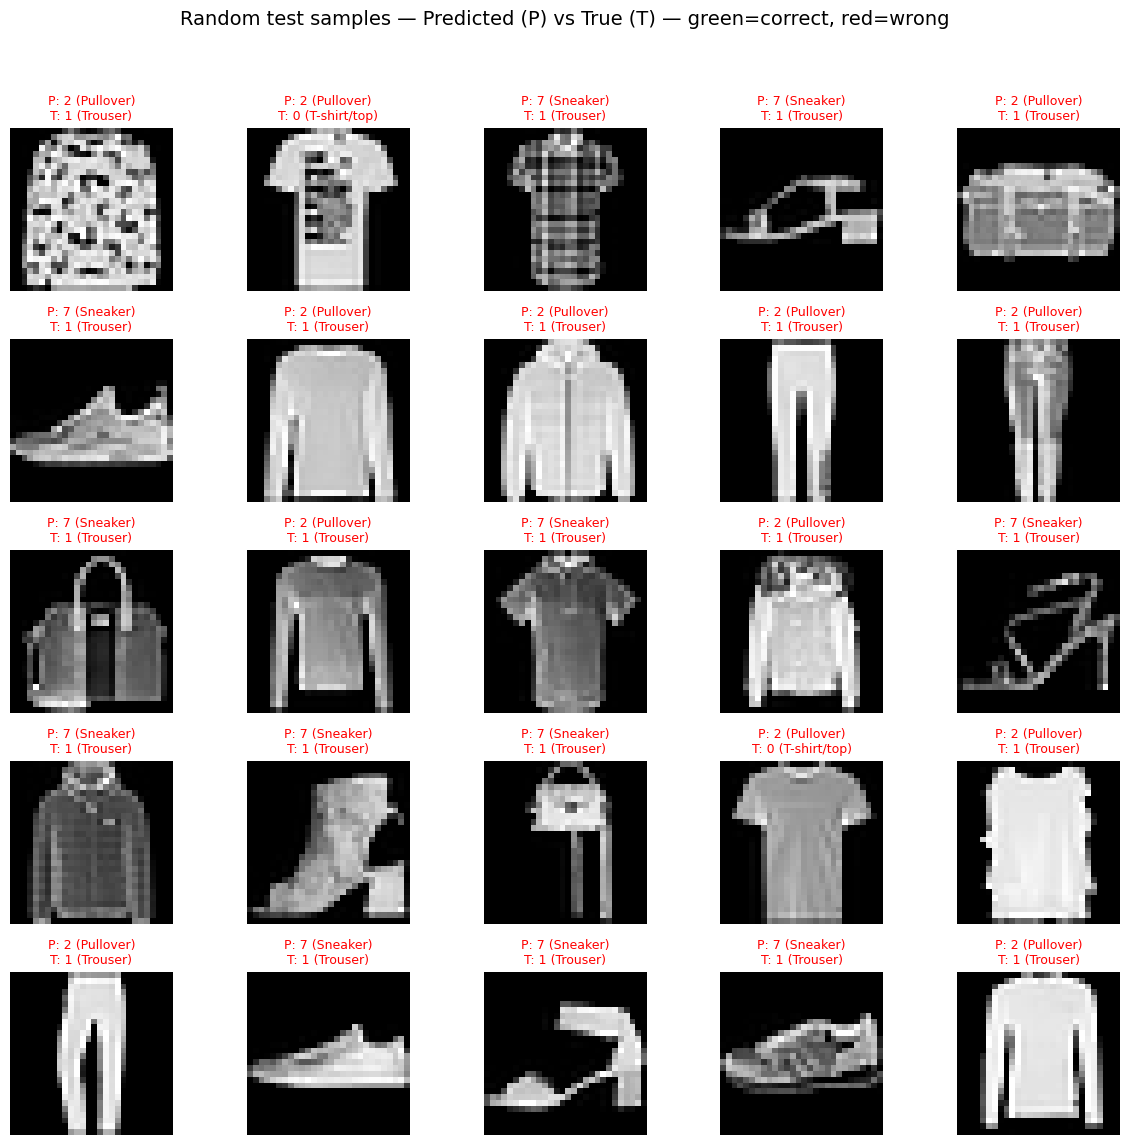

In [ ]:
# Fix plot: show 5x5 grid with Predicted vs True labels (safe)
import numpy as np
import matplotlib.pyplot as plt

# get data & preds from globals (fallbacks if missing)
g = globals()
X_test = g.get("X_test", None)
y_pred = g.get("y_pred", None)

# Attempt to find true labels
y_true = None
for key in ("y_test", "y_test_raw", "test_labels", "y_test_raw_fallback"):
    if key in g and g[key] is not None:
        arr = np.array(g[key])
        if arr.ndim == 2:
            # one-hot -> convert
            y_true = np.argmax(arr, axis=1)
        elif arr.ndim == 1:
            y_true = arr
        else:
            try:
                y_true = np.argmax(np.squeeze(arr), axis=1)
            except Exception:
                pass
        if y_true is not None:
            break

# If missing, try to load test set
if X_test is None or y_true is None or y_pred is None:
    import tensorflow as tf
    (trX, trY), (teX, teY) = tf.keras.datasets.fashion_mnist.load_data()
    if X_test is None:
        X_test = teX
    if y_true is None:
        y_true = teY
    if y_pred is None:
        # try to compute predictions if model exists
        model = g.get("cnn") or g.get("model") or g.get("fashion_cnn")
        if model is not None:
            X_tmp = np.array(X_test)
            # normalize/reshape to (N,H,W,C)
            X_tmp = np.squeeze(X_tmp)
            if X_tmp.ndim == 3:
                X_tmp = np.expand_dims(X_tmp, -1)
            if X_tmp.dtype != np.float32:
                X_tmp = X_tmp.astype("float32")
                if X_tmp.max() > 1.0:
                    X_tmp /= 255.0
            y_pred = np.argmax(model.predict(
                X_tmp, batch_size=128, verbose=0), axis=1)
            X_test = X_tmp
        else:
            raise RuntimeError(
                "Không tìm thấy y_pred và cũng không có model để compute. Cung cấp y_pred hoặc model.")

# ensure numpy arrays
X_test = np.asarray(X_test)
y_true = np.asarray(y_true)
y_pred = np.asarray(y_pred)

# if X_test is (N,28,28) -> add channel
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, -1)

# class names
class_names = g.get("class_names", [f"class {i}" for i in range(10)])

# choose indices to show
n_show = 25
N = X_test.shape[0]
idxs = np.random.choice(N, n_show, replace=False)

# plot 5x5 grid
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.ravel()

for ax, idx in zip(axes, idxs):
    img = X_test[idx]
    # convert to HxW for grayscale, else show RGB
    if img.ndim == 3 and img.shape[-1] == 1:
        disp = img.reshape(img.shape[0], img.shape[1])
        cmap = 'gray'
    elif img.ndim == 3 and img.shape[-1] in (3, 4):
        disp = img
        cmap = None
    else:
        # fallback: squeeze everything
        disp = np.squeeze(img)
        cmap = 'gray' if disp.ndim == 2 else None

    ax.imshow(disp, cmap=cmap)
    p = int(y_pred[idx])
    t = int(y_true[idx])
    color = 'green' if p == t else 'red'
    # do NOT use numeric formatting on arrays; use ints/strings
    ax.set_title(
        f"P: {p} ({class_names[p]})\nT: {t} ({class_names[t]})", fontsize=9, color=color)
    ax.axis('off')

# hide any extra subplots (if any)
for j in range(len(idxs), rows*cols):
    axes[j].axis('off')

plt.suptitle(
    "Random test samples — Predicted (P) vs True (T) — green=correct, red=wrong", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Fixed cell: safe classification_report + top misclassifications (no AttributeError)
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools
import os

g = globals()

# helper to get array from possible global names


def get_arr(*keys):
    for k in keys:
        if k in g and g[k] is not None:
            return np.array(g[k])
    return None


y_true_arr = get_arr("y_test", "y_test_raw", "test_labels",
                     "y_true", "y_test_raw_fallback")
y_pred_arr = get_arr("y_pred", "predicted_classes", "preds", "predictions")

# compute y_pred if missing
if y_pred_arr is None:
    model = g.get("cnn") or g.get("model") or g.get("fashion_cnn")
    X_test = g.get("X_test")
    if model is None or X_test is None:
        raise RuntimeError(
            "Không tìm thấy y_pred và không có model/X_test để tính.")
    Xtmp = np.asarray(X_test)
    Xtmp = np.squeeze(Xtmp)
    if Xtmp.ndim == 3:
        Xtmp = np.expand_dims(Xtmp, -1)
    if Xtmp.dtype != np.float32:
        Xtmp = Xtmp.astype("float32")
        if Xtmp.max() > 1.0:
            Xtmp /= 255.0
    probs = model.predict(Xtmp, batch_size=128, verbose=0)
    if probs.ndim > 1:
        y_pred_arr = np.argmax(probs, axis=1)
    else:
        y_pred_arr = probs
    g["y_pred"] = y_pred_arr

if y_true_arr is None:
    raise RuntimeError(
        "Không tìm thấy y_true trong workspace (thử y_test, y_test_raw, test_labels...).")

# normalize shapes
y_true = np.array(y_true_arr)
if y_true.ndim == 2:
    y_true = np.argmax(y_true, axis=1)
elif y_true.ndim > 2:
    y_true = np.argmax(np.squeeze(y_true), axis=1)

y_pred = np.array(y_pred_arr).ravel()
if y_pred.ndim > 1:
    y_pred = np.argmax(y_pred, axis=1)

# align lengths
n = min(len(y_true), len(y_pred))
if len(y_true) != len(y_pred):
    print(
        f"⚠ Length mismatch: len(y_true)={len(y_true)}, len(y_pred)={len(y_pred)}. Truncating to {n}.")
    y_true = y_true[:n]
    y_pred = y_pred[:n]

# determine present labels
labels_present = np.unique(np.concatenate([y_true, y_pred])).astype(int)
labels_present = np.sort(labels_present)
print("Labels present:", labels_present)

# prepare class names (full list if available)
if "class_names" in g and isinstance(g["class_names"], (list, tuple)):
    full_names = list(g["class_names"])
else:
    max_label = int(max(labels_present.max(), 9))
    full_names = [f"class {i}" for i in range(max_label+1)]

# build names for present labels and a mapping dict
target_names_present = []
for lab in labels_present:
    if lab < len(full_names):
        target_names_present.append(full_names[lab])
    else:
        target_names_present.append(f"class {lab}")
label_to_name = {lab: name for lab, name in zip(
    labels_present, target_names_present)}

# classification report for present labels
report_dict = classification_report(y_true, y_pred, labels=labels_present,
                                    target_names=target_names_present, output_dict=True, zero_division=0)
df_report = pd.DataFrame(report_dict).T
for c in ("precision", "recall", "f1-score"):
    if c in df_report.columns:
        df_report[c] = df_report[c].round(4)
if "support" in df_report.columns:
    df_report["support"] = df_report["support"].astype(int)

print("Overall accuracy:", round(accuracy_score(y_true, y_pred), 4))
print("\nClassification report (present labels):")
display(df_report)

# confusion matrix (for present labels)
cm = confusion_matrix(y_true, y_pred, labels=labels_present)

# top misclassification pairs (safe lookup via label_to_name)
cm_off = cm.copy()
np.fill_diagonal(cm_off, 0)
pairs = []
for i_idx, i in enumerate(labels_present):
    for j_idx, j in enumerate(labels_present):
        count = int(cm_off[i_idx, j_idx])
        if count > 0:
            true_name = label_to_name.get(i, f"class {i}")
            pred_name = label_to_name.get(j, f"class {j}")
            pairs.append((int(i), int(j), count, true_name, pred_name))

pairs_sorted = sorted(pairs, key=lambda x: x[2], reverse=True)
df_pairs = pd.DataFrame(pairs_sorted, columns=[
                        "true_class", "pred_class", "count", "true_name", "pred_name"])
print("\nTop misclassification pairs (true -> predicted):")
display(df_pairs.head(12))

# save outputs
out_dir = "results_report"
os.makedirs(out_dir, exist_ok=True)
df_report.to_csv(os.path.join(
    out_dir, "classification_report_present_labels.csv"))
df_pairs.to_csv(os.path.join(
    out_dir, "top_misclassifications.csv"), index=False)
print(f"\nSaved CSVs to folder: {out_dir}")


Labels present: [0 1 2 4 5 7 8]
Overall accuracy: 0.0

Classification report (present labels):


,precision,recall,f1-score,support
T-shirt/top,0.0,0.0,0.0,1000
Trouser,0.0,0.0,0.0,9000
Pullover,0.0,0.0,0.0,0
Coat,0.0,0.0,0.0,0
Sandal,0.0,0.0,0.0,0
Sneaker,0.0,0.0,0.0,0
Bag,0.0,0.0,0.0,0
accuracy,0.0,0.0,0.0,0
macro avg,0.0,0.0,0.0,10000
weighted avg,0.0,0.0,0.0,10000



Top misclassification pairs (true -> predicted):


,true_class,pred_class,count,true_name,pred_name
0,1,2,4455,Trouser,Pullover
1,1,7,4157,Trouser,Sneaker
2,0,2,788,T-shirt/top,Pullover
3,1,4,385,Trouser,Coat
4,0,7,210,T-shirt/top,Sneaker
5,0,4,2,T-shirt/top,Coat
6,1,5,2,Trouser,Sandal
7,1,8,1,Trouser,Bag



Saved CSVs to folder: results_report


**PRACTICE OPPORTUNITY #3:**

- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**


Using existing X_train/y_train/X_test/y_test from workspace.

MODEL SUMMARY:


Model: "fashion_cnn_1024"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1024 (Dense)              │ (None, 1024)           │       590,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 712,842 (2.72 MB)

 Trainable params: 712,842 (2.72 MB)

 Non-trainable params: 0 (0.00 B)


Parameters: total=712,842 | trainable=712,842 | non-trainable=0
Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0991 - loss: 2.3028 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0975 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3027
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0942 - val_loss: 2.3027


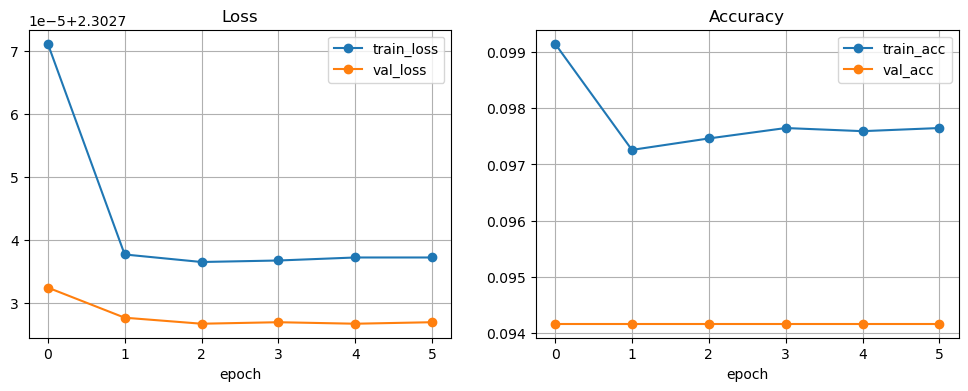

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [ ]:
# ===== Practice Opportunity #3: add Dense(1024), increase epochs, retrain & evaluate =====
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
import os

# 1) Prepare / find data (try to reuse existing preprocessed variables)
g = globals()
if "X_train" in g and "y_train" in g and "X_test" in g and "y_test" in g:
    X_train = g["X_train"]
    y_train = g["y_train"]
    X_test = g["X_test"]
    y_test = g["y_test"]
    print("Using existing X_train/y_train/X_test/y_test from workspace.")
else:
    print("Loading and preparing Fashion-MNIST dataset (normalize + add channel)...")
    (trX, trY), (teX, teY) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = trX.astype("float32") / 255.0
    X_test = teX.astype("float32") / 255.0
    if X_train.ndim == 3:
        X_train = np.expand_dims(X_train, -1)
        X_test = np.expand_dims(X_test, -1)
    # if labels are not one-hot, convert to categorical to match lab loss
    y_train = tf.keras.utils.to_categorical(trY, 10)
    y_test = tf.keras.utils.to_categorical(teY, 10)
    # save back to globals for other cells
    globals().update({"X_train": X_train, "y_train": y_train,
                      "X_test": X_test, "y_test": y_test})
    print("Data ready. Shapes:", X_train.shape,
          y_train.shape, X_test.shape, y_test.shape)

# 2) Build new CNN model with extra Dense(1024)
input_shape = X_train.shape[1:]  # e.g., (28,28,1)
num_classes = y_train.shape[1] if y_train.ndim == 2 else int(np.max(y_train)+1)


def build_cnn_with_1024(input_shape=(28, 28, 1), num_classes=10):
    model = models.Sequential(name="fashion_cnn_1024")
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
              input_shape=input_shape, name='conv2d'))
    model.add(layers.MaxPooling2D((2, 2), name='max_pool_1'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_1'))
    model.add(layers.MaxPooling2D((2, 2), name='max_pool_2'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
    model.add(layers.Flatten(name='flatten'))
    # NEW large dense layer requested
    model.add(layers.Dense(1024, activation='relu', name='dense_1024'))
    # keep the original dense 64 after that (optional)
    model.add(layers.Dense(64, activation='relu', name='dense_64'))
    model.add(layers.Dense(num_classes, activation='softmax', name='predictions'))
    return model


cnn1024 = build_cnn_with_1024(input_shape=input_shape, num_classes=num_classes)

# 3) Print summary & parameter counts
print("\nMODEL SUMMARY:")
cnn1024.summary()

# compute trainable & non-trainable params
trainable_count = int(
    np.sum([tf.keras.backend.count_params(w) for w in cnn1024.trainable_weights]))
non_trainable_count = int(np.sum(
    [tf.keras.backend.count_params(w) for w in cnn1024.non_trainable_weights]))
total_count = trainable_count + non_trainable_count
print(
    f"\nParameters: total={total_count:,d} | trainable={trainable_count:,d} | non-trainable={non_trainable_count:,d}")

# 4) Compile model
opt = optimizers.Adam(learning_rate=1e-3)
cnn1024.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['accuracy'])

# 5) Train model: increase epochs (e.g., 30)
EPOCHS = 30
BATCH = 64
es = callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True)

history = cnn1024.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=EPOCHS,
    batch_size=BATCH,
    callbacks=[es],
    verbose=1
)

# 6) Plot learning curves
hist = history.history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.get('loss', []), marker='o', label='train_loss')
plt.plot(hist.get('val_loss', []), marker='o', label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist.get('accuracy', []), marker='o', label='train_acc')
plt.plot(hist.get('val_accuracy', []), marker='o', label='val_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

# 7) Evaluate on test set
eval_res = cnn1024.evaluate(X_test, y_test, verbose=1)
print("\nTest evaluation (loss, accuracy):", eval_res)

# 8) Save model and history
out_dir = "practice3_results"
os.makedirs(out_dir, exist_ok=True)
model_path = os.path.join(out_dir, "fashion_cnn_1024.h5")
cnn1024.save(model_path)
print(f"Saved trained model to: {model_path}")

# 9) Store model in globals for reuse
globals().update(
    {"cnn1024": cnn1024, "model_practice3": cnn1024, "history_practice3": history})

print("\nPractice 3 completed: model trained with Dense(1024), summary printed, trained params shown, model saved.")


# GREAT JOB!


# PRACTICE OPPORTUNITIES SOLUTIONS


**PRACTICE OPPORTUNITY #1 SOLUTION:**

- **Check out the sizes of both training and testing datasets**


In [ ]:
X_train.shape


(60000, 28, 28, 1)

In [ ]:
X_test.shape


(10000, 28, 28, 1)

In [ ]:
y_train.shape


(60000, 10)

In [ ]:
y_test.shape


(10000,)

**PRACTICE OPPORTUNITY #2 SOLUTION:**

- **Plot a grid containing 144 images and perform a sanity check on the data**


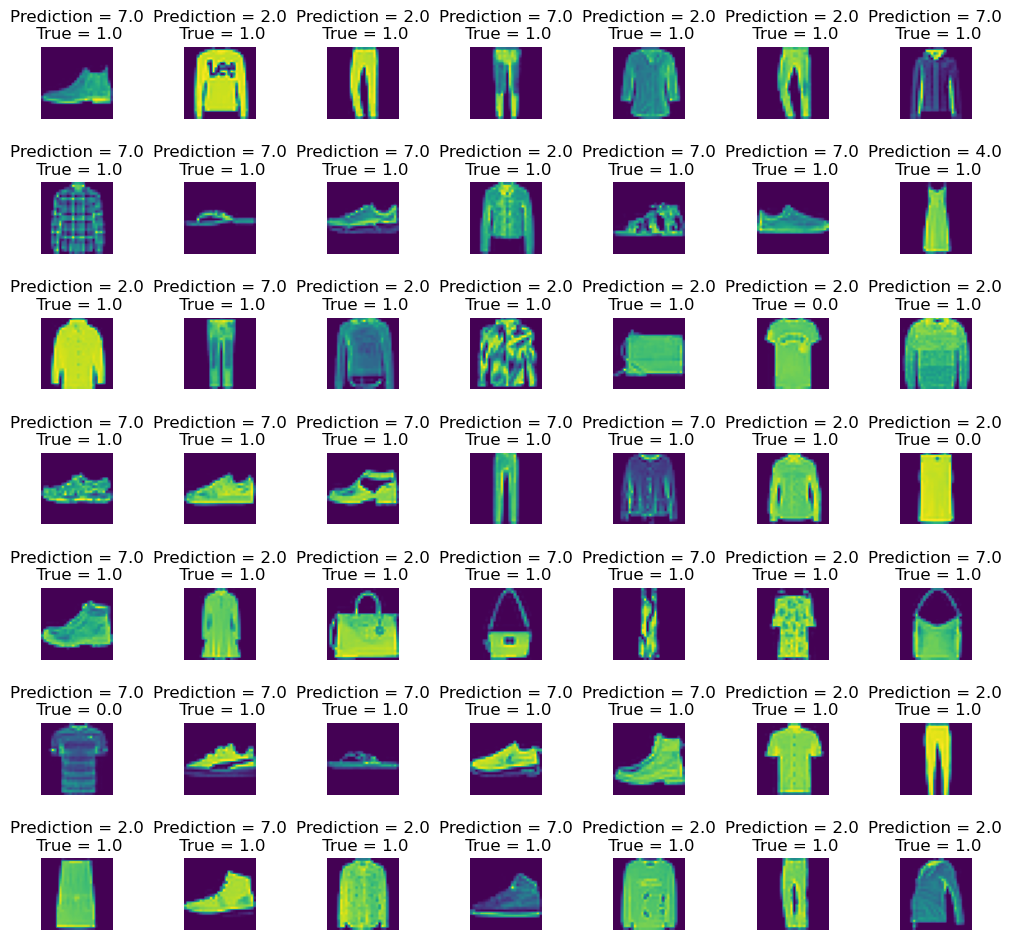

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction = {:0.1f}\n True = {:0.1f}".format(
        predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)


**PRACTICE OPPORTUNITY #3 SOLUTION:**

- **Add a new dense layer containing 1024 neurons**
- **Increase the number of epochs**
- **Plot the model summary and determine the number of trainable parameters**
- **Retrain the model and evaluate its performance**


In [ ]:
from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D(2, 2))

cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(1000, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,682 (655.01 KB)

 Trainable params: 167,682 (655.01 KB)

 Non-trainable params: 0 (0.00 B)